In [2]:
# From the article: https://medium.com/@jesse.b.nestler/how-to-convert-h3-cell-boundaries-to-shapely-polygons-in-python-f7558add2f63v

In [17]:
from shapely.geometry import Point
import geopandas as gpd
import numpy as np
import random
import h3
import matplotlib.pyplot as plt

In [2]:
# Define the range for ELAPSETIME
start = 0
stop = 500

# Define the bounding box for Boulder, CO
minx, miny = -105.301758, 39.964069
maxx, maxy = -105.178925, 40.094555

In [3]:
# Generate a list of random lat-long points within the bounding box
points = [Point(random.uniform(minx, maxx), random.uniform(miny, maxy)) for _ in np.arange(10000)]

In [4]:
# Create a geodataframe with the specified columns and attributes
gdf = gpd.GeoDataFrame({'ELAPSETIME': [random.randint(start, stop) for _ in np.arange(10000)],
                        'geometry': points}, crs='EPSG:4326')

In [5]:


# x = longitude, y = latitude!!!
res = 10
col = f"H3_{res}"
gdf[col] = gdf.apply(lambda row: str(h3.geo_to_h3(row.geometry.y, row.geometry.x, res)), axis=1)

In [7]:
gdf[col]


0       8a2681b18a17fff
1       8a2681a22287fff
2       8a2681a22567fff
3       8a2681b19d07fff
4       8a2681a05357fff
             ...       
9995    8a2681b1ad87fff
9996    8a2681a01c97fff
9997    8a2681a0634ffff
9998    8a2681a2632ffff
9999    8a2681a04147fff
Name: H3_10, Length: 10000, dtype: object

In [8]:
h3_df = gdf.groupby(col)['ELAPSETIME'].describe().reset_index()

In [9]:
from shapely.geometry import Polygon

def cell_to_shapely(cell):
    coords = h3.h3_to_geo_boundary(cell)
    flipped = tuple(coord[::-1] for coord in coords)
    return Polygon(flipped)

In [10]:
h3_geoms = h3_df[col].apply(lambda x: cell_to_shapely(x))
h3_gdf = gpd.GeoDataFrame(data=h3_df, geometry=h3_geoms, crs=4326)

In [14]:
gdf

,ELAPSETIME,geometry,H3_10
0,394,POINT (-105.22977 40.08391),8a2681b18a17fff
1,35,POINT (-105.21688 40.01765),8a2681a22287fff
2,255,POINT (-105.22684 40.02791),8a2681a22567fff
3,348,POINT (-105.22097 40.08038),8a2681b19d07fff
4,332,POINT (-105.18874 39.98525),8a2681a05357fff
...,...,...,...
9995,138,POINT (-105.27764 40.08265),8a2681b1ad87fff
9996,87,POINT (-105.21208 39.97404),8a2681a01c97fff
9997,357,POINT (-105.23805 39.98811),8a2681a0634ffff
9998,164,POINT (-105.20867 40.04527),8a2681a2632ffff


<Axes: >

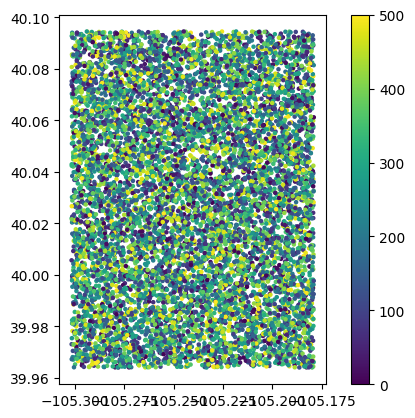

In [15]:
gdf.plot(column='ELAPSETIME', legend=True, cmap='viridis', markersize=5)


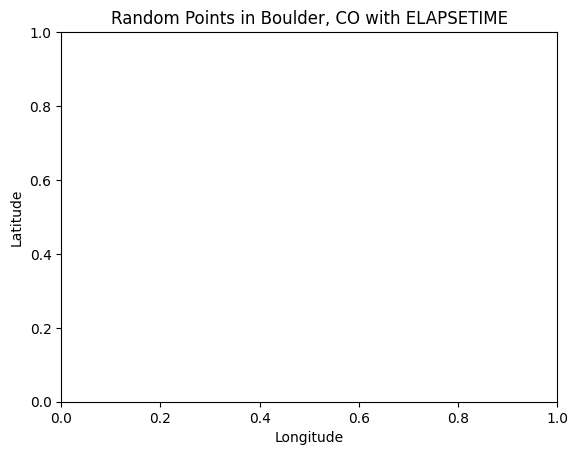

In [18]:
# Display the plot
plt.title('Random Points in Boulder, CO with ELAPSETIME')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
